In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

In [95]:
df = pd.read_excel("tablePres.xlsx")
df

,date,presence
0,2019-09-01,617
1,2019-09-02,620
2,2019-09-03,585
3,2019-09-04,604
4,2019-09-05,702
...,...,...
1075,2022-08-11,694
1076,2022-08-12,0
1077,2022-08-13,503
1078,2022-08-14,633


In [96]:
df.drop(df[df.presence==0].index, inplace=True)

In [97]:
df

,date,presence
0,2019-09-01,617
1,2019-09-02,620
2,2019-09-03,585
3,2019-09-04,604
4,2019-09-05,702
...,...,...
1074,2022-08-10,581
1075,2022-08-11,694
1077,2022-08-13,503
1078,2022-08-14,633


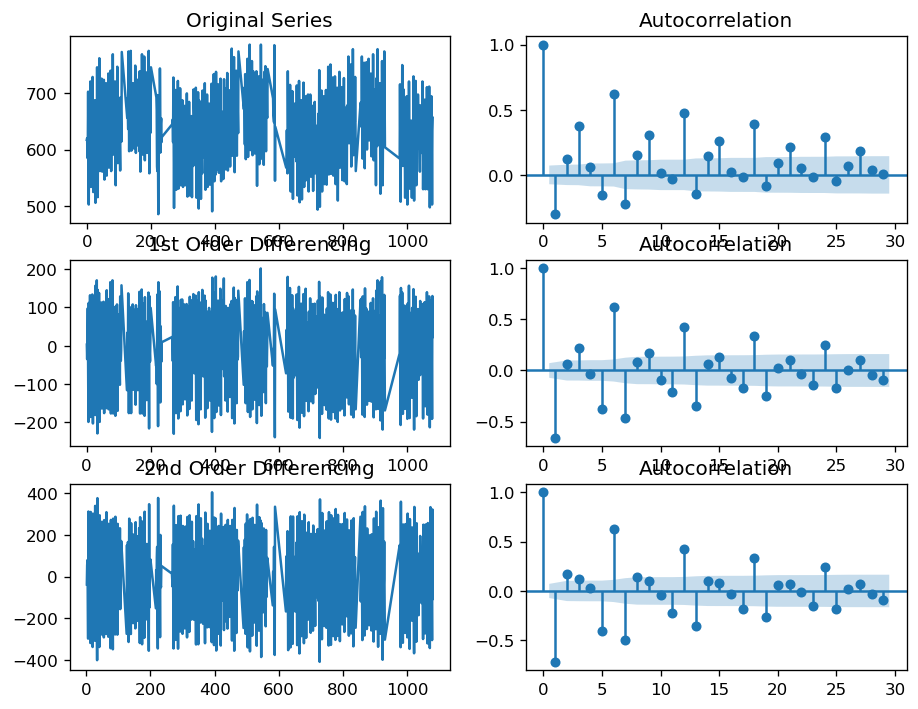

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(df.presence); axes[0, 0].set_title('Original Series')
plot_acf(df.presence, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.presence.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.presence.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.presence.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.presence.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

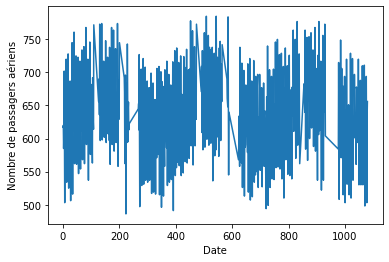

In [98]:
plt.xlabel('Date')
plt.ylabel('Nombre de passagers aériens')
plt.plot(df.presence)

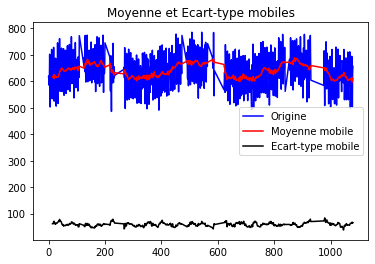

In [99]:
rolling_mean = df.presence.rolling(window = 12).mean()
rolling_std = df.presence.rolling(window = 12).std()
plt.plot(df.presence, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

In [110]:
result = adfuller(df['presence'].diff().diff().dropna())
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -13.025697346684634
p-value : 2.402246807100201e-24
Valeurs Critiques :
	1%: -3.439439614524914
	5%: -2.865551414233055
	10%: -2.5689061365397747


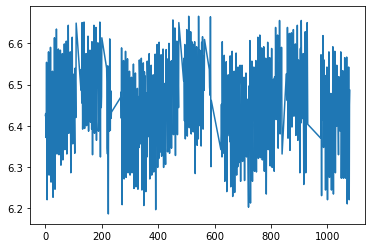

In [86]:
df_log = np.log(df.presence)
plt.plot(df_log)

In [87]:
df_log_minus_mean

14      0.069286
15      0.021209
16     -0.037037
17     -0.029856
18      0.158005
          ...   
1074   -0.033704
1075    0.127615
1077   -0.165544
1078    0.049536
1079    0.078620
Name: presence, Length: 734, dtype: float64

In [88]:
rolling_mean_exp_decay = df.presence.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df.presence - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)

In [89]:
result = adfuller(df_log_exp_decay)
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -3.5144510361173738
p-value : 0.007623625067292525
Valeurs Critiques :
	1%: -3.4393893552577723
	5%: -2.8655292671104644
	10%: -2.5688943376666744


In [90]:
df_log_exp_decay

0         0.000000
1         1.456690
2       -21.710507
3        -1.973088
4        74.541353
           ...    
1074    -26.322742
1075     81.812438
1077   -103.059335
1078     25.428601
1079     45.710513
Name: presence, Length: 745, dtype: float64

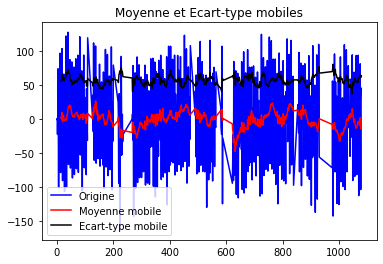

In [94]:
rolling_mean = df_log_exp_decay.rolling(window = 12).mean()
rolling_std = df_log_exp_decay.rolling(window = 12).std()
plt.plot(df_log_exp_decay, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(indexedDataset.presence); axes[0, 0].set_title('Original Series')
plot_acf(indexedDataset.presence, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(indexedDataset.presence.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(indexedDataset.presence.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(indexedDataset.presence.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(indexedDataset.presence.diff().diff().dropna(), ax=axes[2, 1])

plt.show()